# 공공데이터 활용

### Case3. 2017 서울시 구별 CCTV 현황

#### 데이터분석 미션
>- 과제1 : 서울시 구별 경찰서수와 CCTV설치수 조사
>- 과제2 : 경찰서관할별 CCTV (설치대수) 조사
>- 과제3 : 과제1,2를 하나의 그래프로 나타내보자.
>- 과제4 : 경찰서수가 가장 많은구, CCTV가 가장 많이 설치된구를 파이차트로 나타내보자
>- 과제5 : 모든 그래프를 1Page Report로 나타내보자

In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [2]:
df = pd.read_csv('./data/public_seoul_cctv_2017.csv', encoding='EUC-KR')
df.head(10)

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,"1,131"
4,혜화,215,481
5,용산,632,"1,897"
6,성북,453,"1,276"
7,동대문,486,"1,396"
8,마포,703,952
9,영등포,745,"1,122"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   경찰서     32 non-null     object
 1   개소      32 non-null     object
 2   대수      32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [4]:
df.set_index('경찰서', inplace=True) #column['경찰서'] -> index 변환
df.head(5)

,개소,대수
경찰서,,
중부,304,517
종로,214,480
남대문,159,202
서대문,376,"1,131"
혜화,215,481


In [5]:
df['개소'] = df['개소'].str.replace(',', '').astype('int64') #문자열 -> (,)뺀 숫자형으로 변환
df['대수'] = df['대수'].str.replace(',', '').astype('int64') #문자열 -> (,)뺀 숫자형으로 변환
df.tail(10)

,개소,대수
경찰서,,
구로,695,1691
서초,344,1079
양천,763,2234
송파,675,779
노원,1288,1416
방배,236,830
은평,339,1058
도봉,472,485
수서,677,1856


In [6]:
df_1 = df[:-1] #맨 밑에 있는 총계 부분 잘라냄

In [7]:
df_1.columns.name = '개수' #column에 이름 붙여줌
df_1

개수,개소,대수
경찰서,,
중부,304,517
종로,214,480
남대문,159,202
서대문,376,1131
혜화,215,481
용산,632,1897
성북,453,1276
동대문,486,1396
마포,703,952


### 서울시 구별 경찰서수와 CCTV설치수 누적그래프 그리기

In [8]:
plt.rcParams['figure.figsize'] = [20,12]

<AxesSubplot:title={'center':'서울시 구별 경찰서수와 CCTV설치수'}, xlabel='경찰서'>

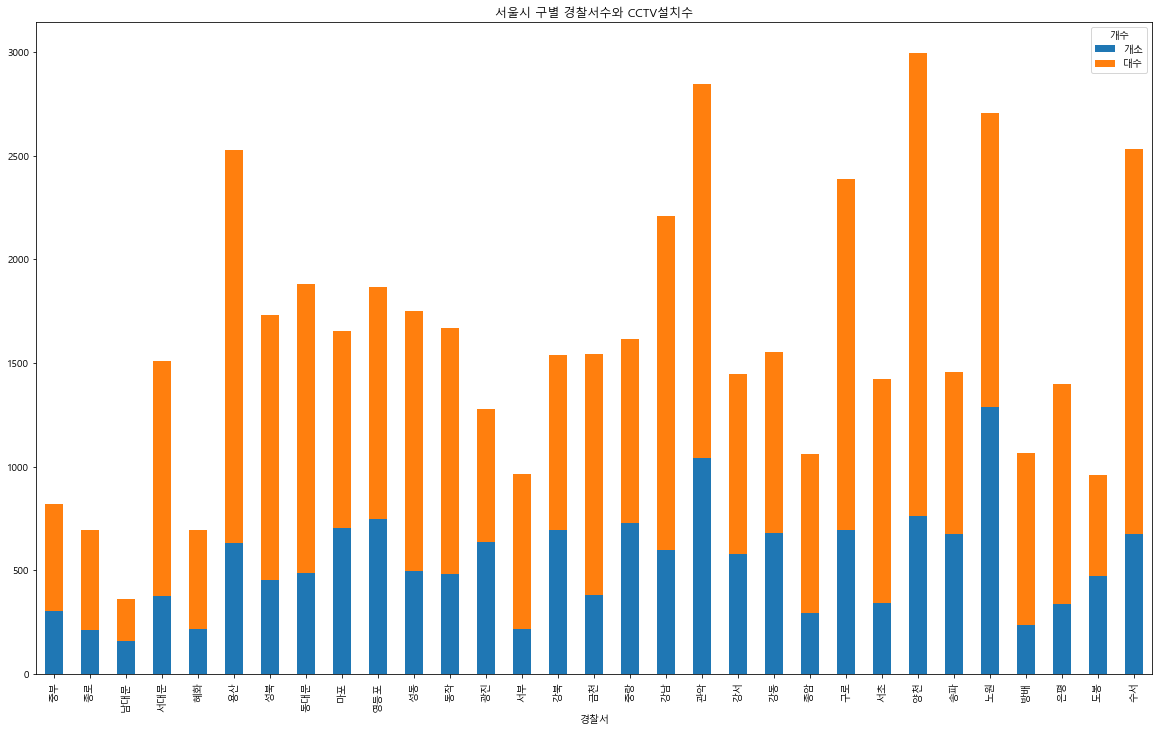

In [9]:
df_1.plot(kind = 'bar', title = '서울시 구별 경찰서수와 CCTV설치수', stacked=True)

### 경찰서관할 CCTV(대수)

In [10]:
df_1.index

Index(['중부', '종로', '남대문', '서대문', '혜화', '용산', '성북', '동대문', '마포', '영등포', '성동',
       '동작', '광진', '서부', '강북', '금천', '중랑', '강남', '관악', '강서', '강동', '종암', '구로',
       '서초', '양천', '송파', '노원', '방배', '은평', '도봉', '수서'],
      dtype='object', name='경찰서')

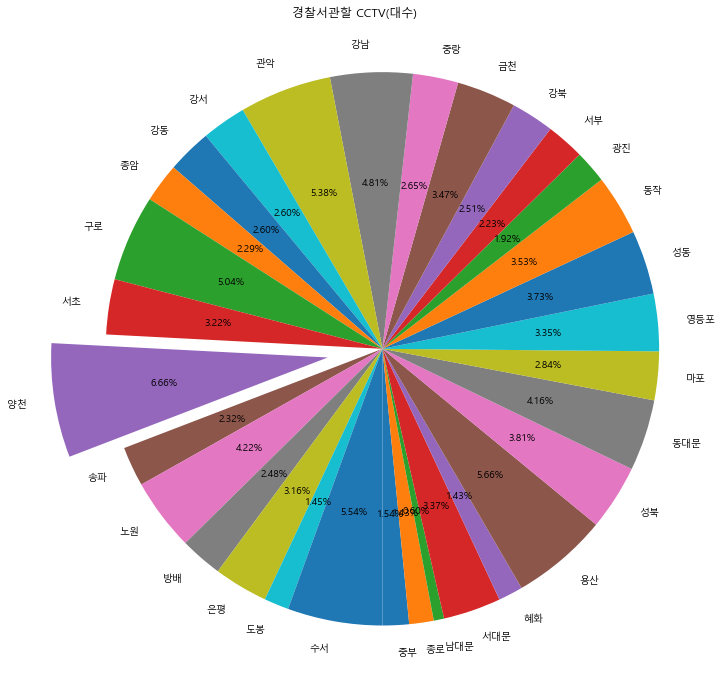

In [11]:
plt.rcParams['figure.figsize'] = [12,12]

labels = list(df_1.index)
sizes = list(df_1['대수'])
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=-90)

plt.title('경찰서관할 CCTV(대수)')
ax1.axis('equal')
plt.show()

In [12]:
df_1['개소']

경찰서
중부      304
종로      214
남대문     159
서대문     376
혜화      215
용산      632
성북      453
동대문     486
마포      703
영등포     745
성동      497
동작      484
광진      637
서부      216
강북      696
금천      382
중랑      727
강남      596
관악     1042
강서      576
강동      679
종암      295
구로      695
서초      344
양천      763
송파      675
노원     1288
방배      236
은평      339
도봉      472
수서      677
Name: 개소, dtype: int64

### 경찰서관할 파출소(개소)

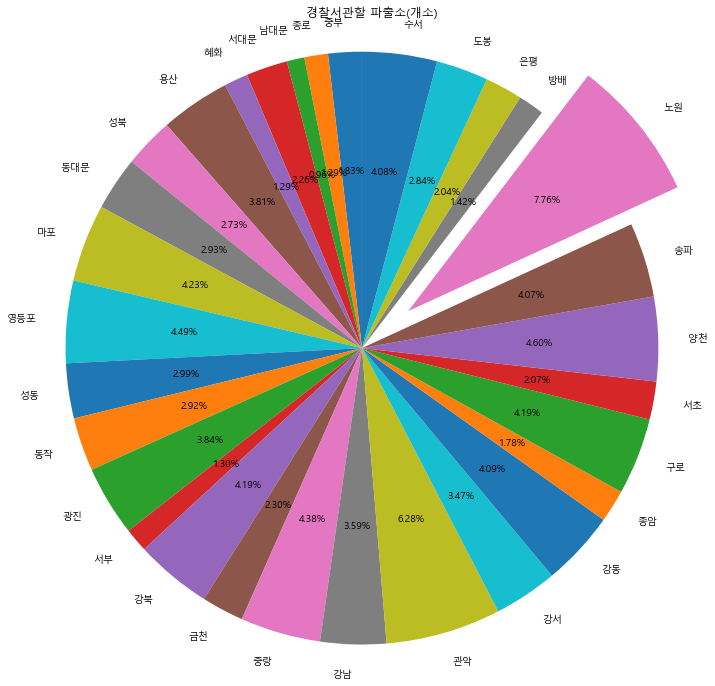

In [13]:
plt.rcParams['figure.figsize'] = [12,12]

labels = list(df_1.index)
sizes = list(df_1['개소'])
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=90)

plt.title('경찰서관할 파출소(개소)')
ax1.axis('equal')
plt.show()

# Q. 질문:
> 아래 빈 상자가 왜 생기는건지 도저히 모르겠습니다...............

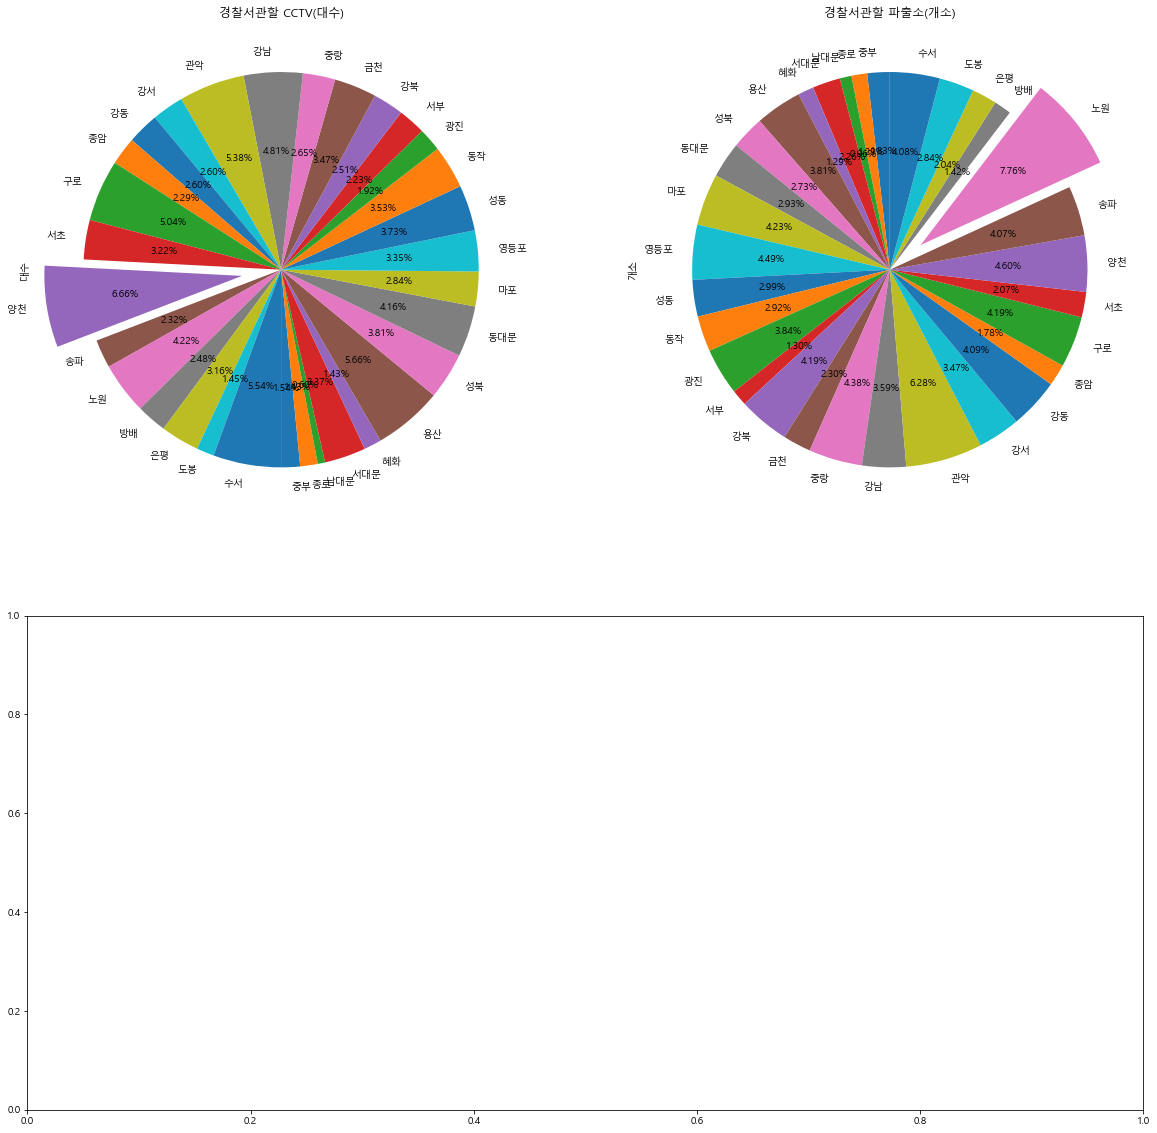

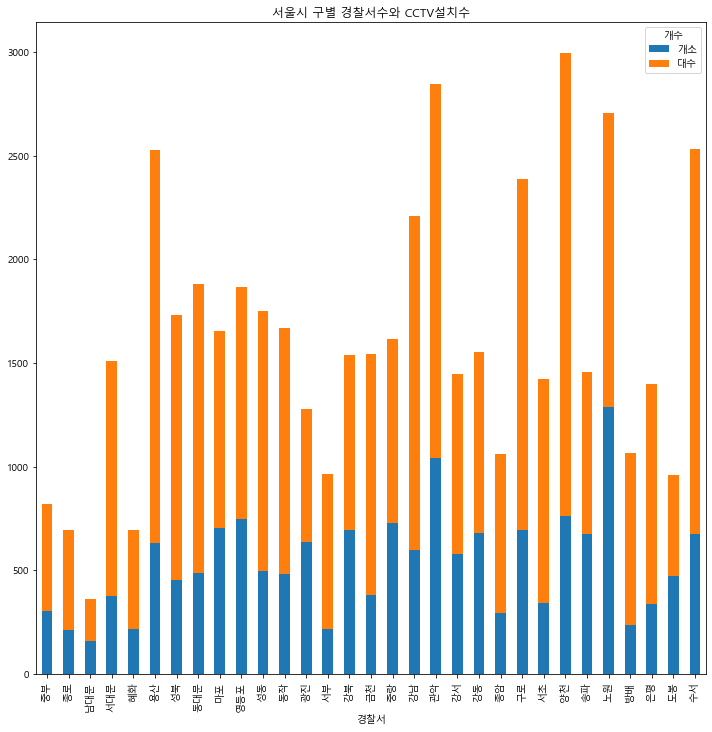

In [14]:
plt.figure(figsize=(20,20)) #도화지

plt.subplot(221) 
plt.title("경찰서관할 CCTV(대수)")
df_1['대수'].plot(kind='pie', labels = list(df_1.index), autopct='%1.2f%%', shadow=False, startangle=-90,
                explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0))

plt.subplot(222)
plt.title("경찰서관할 파출소(개소)")
df_1['개소'].plot(kind='pie', labels = list(df_1.index), autopct='%1.2f%%', shadow=False, startangle=90, 
                explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0))

plt.subplot(212)
df_1.plot(kind = 'bar', title = '서울시 구별 경찰서수와 CCTV설치수', stacked=True)

plt.show()